<a href="https://colab.research.google.com/github/kirath2205/Information-Retrieval/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
bmw = pd.read_csv('BMW_Labelled.csv')
bmw.drop("Unnamed: 0",axis=1, inplace=True)
bmw = bmw[(bmw['Sentiment']==1) | (bmw['Sentiment']==0) | (bmw['Sentiment']==-1)]
bmw.reset_index(inplace=True, drop=True)
bmw.head()

,id,username,created_at,date,Sentiment,tweet,language,hashtags,cashtags,link,urls,photos,video,thumbnail,nlikes,nreplies,nretweets
0,1.510000e+18,23ABCNews,1.650000e+12,29/3/2022 23:45,-1.0,UPDATE: CHP said a man was killed Monday night...,en,[],[],https://twitter.com/23ABCNews/status/150883271...,['https://www.turnto23.com/news/local-news/one...,[],0,NaN,0,0,0
1,1.510000e+18,CloseHouseGolf,1.650000e+12,29/3/2022 23:30,1.0,Another incredible Close House VIP car deliver...,en,"['bmw', 'vip', 'dreamcar']",[],https://twitter.com/CloseHouseGolf/status/1508...,[],['https://pbs.twimg.com/media/FPBv1x2WQA49E4s....,1,https://pbs.twimg.com/media/FPBv1x2WQA49E4s.jpg,7,0,0
2,1.510000e+18,GadgetFlow,1.650000e+12,29/3/2022 23:30,1.0,The @BMW Motorrad Definition CE 04 sit-on #eSc...,en,"['escooter', 'transportation']",[],https://twitter.com/GadgetFlow/status/15088288...,['https://thegadgetflow.com/portfolio/bmw-moto...,['https://pbs.twimg.com/media/FPBv1chX0AcuHfs....,1,https://pbs.twimg.com/media/FPBv1chX0AcuHfs.jpg,0,0,0
3,1.510000e+18,TheBoltonNews,1.650000e+12,29/3/2022 23:02,-1.0,'A tragedy for all concerned': Speeding driver...,en,[],[],https://twitter.com/TheBoltonNews/status/15088...,['https://www.theboltonnews.co.uk/news/2002930...,[],0,NaN,1,0,1
4,1.510000e+18,BMW_UK,1.650000e+12,29/3/2022 22:33,-1.0,"@lynpaul6 Hi Lyn, we're sorry to hear your BMW...",en,[],[],https://twitter.com/BMW_UK/status/150881450842...,[],[],0,NaN,0,2,0


In [2]:
bmw.shape

(438, 17)

In [3]:
print("Positive: "+str(len(bmw[bmw['Sentiment']==1])))
print("Neutral: "+str(len(bmw[bmw['Sentiment']==0])))
print("Negative: "+str(len(bmw[bmw['Sentiment']==-1])))

Positive: 204
Neutral: 66
Negative: 168


In [4]:
tesla = pd.read_csv('labelled_data_tesla.csv')
tesla.drop("Unnamed: 0",axis=1, inplace=True)
tesla = tesla[(tesla['Sentiment']==1) | (tesla['Sentiment']==0) | (tesla['Sentiment']==-1)]
tesla.reset_index(inplace=True, drop=True)
tesla.head()

,id,username,created_at,date,Sentiment,tweet,language,hashtags,cashtags,link,urls,photos,video,thumbnail,nlikes,nreplies,nretweets
0,1.510000e+18,stonercatstv,1.650000e+12,29/3/2022 23:42,0.0,@dillonthecoder dillon haha thx for letting me...,en,[],[],https://twitter.com/stonercatstv/status/150883...,[],[],0.0,NaN,0.0,0.0,0.0
1,1.510000e+18,YahooFinance,1.650000e+12,29/3/2022 23:41,1.0,Tesla stock split indicates 'a massive positio...,en,[],[],https://twitter.com/YahooFinance/status/150883...,['https://yhoo.it/3uDPJ0F'],['https://pbs.twimg.com/media/FPByXztWUAICHiY....,1.0,https://pbs.twimg.com/media/FPByXztWUAICHiY.jpg,20.0,1.0,3.0
2,1.510000e+18,AlbertBridgeCap,1.650000e+12,29/3/2022 23:35,-1.0,"$-for-$, the F-150 Lightning will have the sam...",en,[],['tsla'],https://twitter.com/AlbertBridgeCap/status/150...,['https://www.caranddriver.com/ford/f-150-ligh...,[],0.0,NaN,5.0,3.0,0.0
3,1.510000e+18,EntrepreneurIND,1.650000e+12,29/3/2022 23:30,1.0,"#Creative, #dynamic and perpetually active â€“...",en,"['creative', 'dynamic', 'elonmusk', 'twitter',...",[],https://twitter.com/EntrepreneurIND/status/150...,['https://www.entrepreneur.com/article/423267'],[],0.0,NaN,0.0,0.0,1.0
4,1.510000e+18,SamAntar,1.650000e+12,29/3/2022 23:25,-1.0,"Yes. You can fool 100% of your bagholders, 98%...",en,[],['tsla'],https://twitter.com/SamAntar/status/1508827795...,[],[],0.0,NaN,4.0,0.0,0.0


In [5]:
tesla.shape

(579, 17)

In [6]:
print("Positive: "+str(len(tesla[tesla['Sentiment']==1])))
print("Neutral: "+str(len(tesla[tesla['Sentiment']==0])))
print("Negative: "+str(len(tesla[tesla['Sentiment']==-1])))

Positive: 322
Neutral: 57
Negative: 200


In [7]:
df = pd.concat([bmw,tesla])
df.reset_index(inplace=True, drop=True)

In [8]:
df.shape

(1017, 17)

In [9]:
df.head()

,id,username,created_at,date,Sentiment,tweet,language,hashtags,cashtags,link,urls,photos,video,thumbnail,nlikes,nreplies,nretweets
0,1.510000e+18,23ABCNews,1.650000e+12,29/3/2022 23:45,-1.0,UPDATE: CHP said a man was killed Monday night...,en,[],[],https://twitter.com/23ABCNews/status/150883271...,['https://www.turnto23.com/news/local-news/one...,[],0.0,NaN,0.0,0.0,0.0
1,1.510000e+18,CloseHouseGolf,1.650000e+12,29/3/2022 23:30,1.0,Another incredible Close House VIP car deliver...,en,"['bmw', 'vip', 'dreamcar']",[],https://twitter.com/CloseHouseGolf/status/1508...,[],['https://pbs.twimg.com/media/FPBv1x2WQA49E4s....,1.0,https://pbs.twimg.com/media/FPBv1x2WQA49E4s.jpg,7.0,0.0,0.0
2,1.510000e+18,GadgetFlow,1.650000e+12,29/3/2022 23:30,1.0,The @BMW Motorrad Definition CE 04 sit-on #eSc...,en,"['escooter', 'transportation']",[],https://twitter.com/GadgetFlow/status/15088288...,['https://thegadgetflow.com/portfolio/bmw-moto...,['https://pbs.twimg.com/media/FPBv1chX0AcuHfs....,1.0,https://pbs.twimg.com/media/FPBv1chX0AcuHfs.jpg,0.0,0.0,0.0
3,1.510000e+18,TheBoltonNews,1.650000e+12,29/3/2022 23:02,-1.0,'A tragedy for all concerned': Speeding driver...,en,[],[],https://twitter.com/TheBoltonNews/status/15088...,['https://www.theboltonnews.co.uk/news/2002930...,[],0.0,NaN,1.0,0.0,1.0
4,1.510000e+18,BMW_UK,1.650000e+12,29/3/2022 22:33,-1.0,"@lynpaul6 Hi Lyn, we're sorry to hear your BMW...",en,[],[],https://twitter.com/BMW_UK/status/150881450842...,[],[],0.0,NaN,0.0,2.0,0.0


In [10]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string


#Run these two lines only once
nltk.download('stopwords')
nltk.download('wordnet')

valid_characters = string.ascii_letters+".,';"

def preprocess_tweets(df):

    print(df['tweet'][0])
    #Removing urls and stripping whitespaces
    for i in range(len(df['tweet'])):
        df['tweet'][i] = re.sub(r'http\S+', '', df['tweet'][i])
        df['tweet'][i] = df['tweet'][i].strip()

    
    #Removing hashtags and mentions
    for i in range(len(df['tweet'])):
        df['tweet'][i] = ' '.join([word for word in df['tweet'][i].split() if word[0]!='@' and word[0]!='#'])

    #Only keeping words containing ascii letters
    for i in range(len(df['tweet'])):
        new_tweet_list = []
        for word in df['tweet'][i].split():
            is_valid_word = True
            for letter in word:
                if letter not in valid_characters:
                    is_valid_word = False
                    break
            if is_valid_word:
                new_tweet_list.append(word)

        df['tweet'][i] = ' '.join(new_tweet_list)




    #Lowercasing all texts, removing stopwords, and lemmatizing the texts
    stopwordsList = stopwords.words('english') 
    lemmatizer = WordNetLemmatizer()
    for i in range(len(df['tweet'])):
        df['tweet'][i] = df['tweet'][i].lower()
        df['tweet'][i] = ' '.join([word for word in df['tweet'][i].split() if word not in stopwordsList])
        df['tweet'][i] = ' '.join([lemmatizer.lemmatize(word) for word in df['tweet'][i].split()])

    return df



df = preprocess_tweets(df)
    


    



    



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
UPDATE: CHP said a man was killed Monday night after accelerating his car rapidly in the rain caused him to lose control of his 2009 BMW and veer into the opposite lane of traffic and crash in a Ford in Northwest Bakersfield.  https://t.co/N9cxzMbWaZ


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to b

In [11]:

import numpy as np
 
train_size = 0.8

X_pos = np.array(df[df['Sentiment']==1]['tweet'])
X_neu = np.array(df[df['Sentiment']==0]['tweet'])
X_neg = np.array(df[df['Sentiment']==-1]['tweet'])

np.random.shuffle(X_pos)
np.random.shuffle(X_neu)
np.random.shuffle(X_neg)

X_train_pos = X_pos[:int(np.floor(train_size*len(X_pos)))]
X_train_neu = X_neu[:int(np.floor(train_size*len(X_neu)))]
X_train_neg = X_neg[:int(np.floor(train_size*len(X_neg)))]

y_train_pos = np.array([1]*len(X_train_pos))
y_train_neu = np.array([0]*len(X_train_neu))
y_train_neg = np.array([-1]*len(X_train_neg))

X_test_pos = X_pos[int(np.floor(train_size*len(X_pos))):]
X_test_neu = X_neu[int(np.floor(train_size*len(X_neu))):]
X_test_neg = X_neg[int(np.floor(train_size*len(X_neg))):]

y_test_pos = np.array([1]*len(X_test_pos))
y_test_neu = np.array([0]*len(X_test_neu))
y_test_neg = np.array([-1]*len(X_test_neg))


X_train = np.concatenate((X_train_pos, X_train_neu, X_train_neg),axis=None)
y_train = np.concatenate((y_train_pos, y_train_neu, y_train_neg),axis=None)
X_test = np.concatenate((X_test_pos, X_test_neu, X_test_neg),axis=None)
y_test = np.concatenate((y_test_pos, y_test_neu, y_test_neg),axis=None)






# X_pos_train, X_pos_test , y_pos_train, y_pos_test = train_test_split(X_pos, y , test_size = 0.10)

In [12]:
len(X_test)

205

In [13]:
from keras.preprocessing.text import Tokenizer
vocab_size = 5000
oov_token = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

In [14]:
word_index = tokenizer.word_index

In [15]:
print(word_index)

{'<OOV>': 1, 'tesla': 2, 'bmw': 3, 'car': 4, 'new': 5, 'stock': 6, 'elon': 7, 'vehicle': 8, 'musk': 9, 'year': 10, 'electric': 11, 'u': 12, 'driver': 13, 'model': 14, 'first': 15, 'split': 16, 'say': 17, 'price': 18, 'like': 19, 'said': 20, 'via': 21, 'driving': 22, 'black': 23, 'one': 24, 'two': 25, 'would': 26, 'day': 27, 'know': 28, 'time': 29, 'get': 30, 'share': 31, 'people': 32, 'could': 33, 'factory': 34, 'drive': 35, 'medium': 36, 'company': 37, 'take': 38, 'production': 39, 'road': 40, 'twitter': 41, 'plant': 42, 'battery': 43, 'billion': 44, 'ix': 45, 'big': 46, 'ceo': 47, 'worker': 48, 'want': 49, "tesla's": 50, 'look': 51, 'series': 52, 'another': 53, 'april': 54, 'crash': 55, 'social': 56, 'ev': 57, 'make': 58, 'platform': 59, 'second': 60, 'call': 61, 'former': 62, 'design': 63, 'watch': 64, 'million': 65, 'go': 66, 'range': 67, 'plan': 68, 'man': 69, 'police': 70, 'read': 71, 'german': 72, 'set': 73, 'market': 74, 'week': 75, 'le': 76, 'employee': 77, 'buy': 78, 'maker':

In [16]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)

In [17]:
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [18]:
max_length = 100
padding_type='post'
truncation_type='post'

from keras.preprocessing.sequence import pad_sequences

X_test_padded = pad_sequences(X_test_sequences,maxlen=max_length, padding=padding_type, truncating=truncation_type)
X_train_padded = pad_sequences(X_train_sequences,maxlen=max_length, padding=padding_type, truncating=truncation_type)


In [19]:
!wget --no-check-certificate \
     http://nlp.stanford.edu/data/glove.6B.zip \
     -O /tmp/glove.6B.zip

--2022-04-06 07:56:04--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-04-06 07:56:04--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-04-06 07:56:04--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘/tmp/glove.6B.zip’

/t

In [20]:
import os
import zipfile
with zipfile.ZipFile('/tmp/glove.6B.zip', 'r') as zip_ref:
    zip_ref.extractall('/tmp/glove')

In [21]:
embeddings_index = {}
f = open('/tmp/glove/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [22]:
embedding_matrix = np.zeros((len(word_index) + 1, max_length))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [23]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout

embedding_layer = Embedding(input_dim=len(word_index) + 1,
                            output_dim=max_length,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=True)

In [31]:
import tensorflow as tf

tf.keras.backend.clear_session()

from tensorflow.keras.models import Sequential


#Bidirectional LSTM based model
# model = Sequential([
#     embedding_layer,
#     Bidirectional(LSTM(64, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)), 
#     Bidirectional(LSTM(32, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)),
#     Bidirectional(LSTM(16, dropout=0.5, recurrent_dropout=0.5)),
#     Dense(128, activation='relu', kernel_regularizer='l2'),
#     Dropout(0.4),
#     Dense(64, activation='relu', kernel_regularizer='l2'),
#    Dense(3, activation='softmax')
# ])

#Global Average Pooling based Model
model = tf.keras.Sequential([
    embedding_layer,
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
                             
])




In [32]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
X_train_padded = np.array(X_train_padded)
y_train_labels = np.array(y_train)
X_test_padded = np.array(X_test_padded)
y_test_labels = np.array(y_test)

In [34]:
y_train_labels_one_hot_encoded = tf.keras.utils.to_categorical(y_train_labels, 3)
y_test_labels_one_hot_encoded = tf.keras.utils.to_categorical(y_test_labels, 3)

Bi-Directional LSTMs

In [28]:
#Bi-LSTMs
import tensorflow
from tensorflow.keras.callbacks import EarlyStopping

checkpoint_filepath = 'weights.{epoch:02d}-{val_loss:.2f}.h5'

model_checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10), 


num_epochs = 100
history = model.fit(X_train_padded, y_train_labels_one_hot_encoded, epochs=num_epochs, validation_data=(X_test_padded, y_test_labels_one_hot_encoded), callbacks=[model_checkpoint_callback, early_stopping_callback])

Epoch 1/100
26/26 [==============================] - 136s 4s/step - loss: 2.1717 - accuracy: 0.4655 - val_loss: 1.8820 - val_accuracy: 0.5171
Epoch 2/100
26/26 [==============================] - 116s 4s/step - loss: 1.7253 - accuracy: 0.5357 - val_loss: 1.5464 - val_accuracy: 0.5171
Epoch 3/100
26/26 [==============================] - 115s 4s/step - loss: 1.3757 - accuracy: 0.6601 - val_loss: 1.2422 - val_accuracy: 0.6829
Epoch 4/100
26/26 [==============================] - 114s 4s/step - loss: 1.1387 - accuracy: 0.7057 - val_loss: 1.0733 - val_accuracy: 0.7268
Epoch 5/100
26/26 [==============================] - 113s 4s/step - loss: 0.9593 - accuracy: 0.7463 - val_loss: 0.9606 - val_accuracy: 0.7415
Epoch 6/100
26/26 [==============================] - 111s 4s/step - loss: 0.8270 - accuracy: 0.7623 - val_loss: 0.8919 - val_accuracy: 0.7366
Epoch 7/100
26/26 [==============================] - 111s 4s/step - loss: 0.7148 - accuracy: 0.7980 - val_loss: 0.8942 - val_accuracy: 0.7268
Epoch 

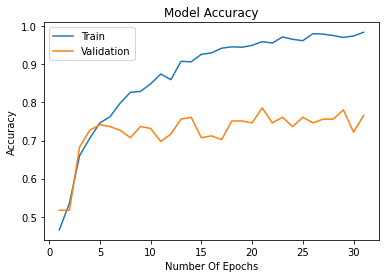

In [29]:
#For Bidirectional LSTMs
import matplotlib.pyplot as plt

epochs=[x for x in range(1,32)]

plt.plot(epochs,history.history['accuracy'])
plt.plot(epochs,history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number Of Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

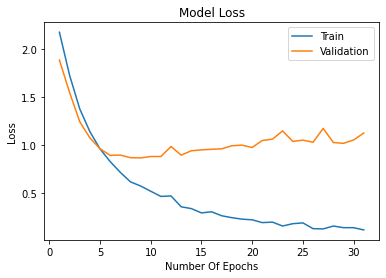

In [30]:
#For Bidirectional LSTMs
epochs=[x for x in range(1,32)]

plt.plot(epochs,history.history['loss'])
plt.plot(epochs,history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number Of Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Global Average Pooling

In [35]:
#Global Average Pooling

import tensorflow
from tensorflow.keras.callbacks import EarlyStopping

checkpoint_filepath = 'weights.{epoch:02d}-{val_loss:.2f}.h5'

model_checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10), 


num_epochs = 100
history = model.fit(X_train_padded, y_train_labels_one_hot_encoded, epochs=num_epochs, validation_data=(X_test_padded, y_test_labels_one_hot_encoded), callbacks=[model_checkpoint_callback, early_stopping_callback])

Epoch 1/100
26/26 [==============================] - 1s 16ms/step - loss: 1.0581 - accuracy: 0.5135 - val_loss: 1.0153 - val_accuracy: 0.5171
Epoch 2/100
26/26 [==============================] - 0s 8ms/step - loss: 0.9895 - accuracy: 0.5172 - val_loss: 0.9706 - val_accuracy: 0.5171
Epoch 3/100
26/26 [==============================] - 0s 8ms/step - loss: 0.9617 - accuracy: 0.5172 - val_loss: 0.9600 - val_accuracy: 0.5171
Epoch 4/100
26/26 [==============================] - 0s 8ms/step - loss: 0.9382 - accuracy: 0.5222 - val_loss: 0.9385 - val_accuracy: 0.5268
Epoch 5/100
26/26 [==============================] - 0s 9ms/step - loss: 0.9117 - accuracy: 0.5603 - val_loss: 0.9205 - val_accuracy: 0.5415
Epoch 6/100
26/26 [==============================] - 0s 8ms/step - loss: 0.8858 - accuracy: 0.6034 - val_loss: 0.9019 - val_accuracy: 0.6049
Epoch 7/100
26/26 [==============================] - 0s 7ms/step - loss: 0.8542 - accuracy: 0.6281 - val_loss: 0.8816 - val_accuracy: 0.6049
Epoch 8/100


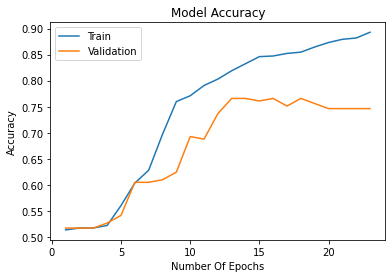

In [36]:
#Global Average Pooling
import matplotlib.pyplot as plt

epochs=[x for x in range(1,24)]

plt.plot(epochs,history.history['accuracy'])
plt.plot(epochs,history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number Of Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

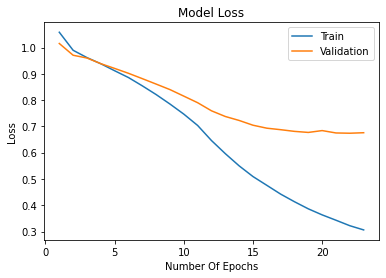

In [37]:
#For Global Average Pooling
epochs=[x for x in range(1,24)]

plt.plot(epochs,history.history['loss'])
plt.plot(epochs,history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number Of Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

**BERT**

Setup

In [38]:
# A dependency of the preprocessing for BERT inputs
!pip install -q -U "tensorflow-text==2.8.*"

     |████████████████████████████████| 4.9 MB 5.3 MB/s 
     |████████████████████████████████| 462 kB 47.1 MB/s 


In [39]:
!pip install -q tf-models-official==2.7.0

     |████████████████████████████████| 1.8 MB 5.5 MB/s 
     |████████████████████████████████| 99 kB 6.7 MB/s 
     |████████████████████████████████| 596 kB 32.0 MB/s 
     |████████████████████████████████| 47.8 MB 13.5 MB/s 
     |████████████████████████████████| 90 kB 7.3 MB/s 
     |████████████████████████████████| 1.2 MB 32.2 MB/s 
     |████████████████████████████████| 43 kB 1.3 MB/s 
     |████████████████████████████████| 237 kB 45.5 MB/s 
     |████████████████████████████████| 1.1 MB 46.5 MB/s 
     |████████████████████████████████| 352 kB 51.9 MB/s 


In [40]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

**Exploring the IMDB Dataset For Testing BERT**

In [41]:
url = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'

dataset = tf.keras.utils.get_file('aclImdb_v1.tar.gz', url,
                                  untar=True, cache_dir='.',
                                  cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

train_dir = os.path.join(dataset_dir, 'train')

# remove unused folders to make it easier to load the data
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

84140032/84125825 [==============================] - 3s 0us/step


In [ ]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' 

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
text_test = ['this is such an amazing movie!']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_mask', 'input_word_ids', 'input_type_ids']
Shape      : (1, 128)
Word Ids   : [ 101 2023 2003 2107 2019 6429 3185  999  102    0    0    0]
Input Mask : [1 1 1 1 1 1 1 1 1 0 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[ 0.7626282   0.9928099  -0.18611862  0.3667383   0.15233758  0.655044
  0.9681154  -0.94862705  0.0021616  -0.9877732   0.06842764 -0.97630596]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[-0.28946292  0.34321183  0.33231512 ...  0.21300802  0.7102092
  -0.05771042]
 [-0.28741995  0.31980985 -0.23018652 ...  0.5845511  -0.21329862
   0.72692007]
 [-0.6615692   0.68876815 -0.8743301  ...  0.1087728  -0.26173076
   0.47855455]
 ...
 [-0.22561137 -0.2892573  -0.07064426 ...  0.47566032  0.8327724
   0.40025347]
 [-0.2982421  -0.27473164 -0.05450544 ...  0.4884972   1.0955367
   0.18163365]
 [-0.4437818   0.00930662  0.07223704 ...  0.17290089  1.1833239
   0.07897975]]
